In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [34]:

data=pd.read_csv('Rainfall.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [36]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [39]:
data.duplicated().sum()

np.int64(0)

In [40]:
data.columns=data.columns.str.strip()

In [49]:
data.replace({"rainfall":{"yes":1,"no":0}},inplace=True)

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1768886859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"rainfall":{"yes":1,"no":0}},inplace=True)


In [51]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [54]:
X=data.drop(columns='rainfall')
Y=data["rainfall"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [58]:
def show_nulls(x_train,x_test):

    print(x_train.isna().sum())
    print(20*"-")
    print(x_test.isna().sum())
    
    
show_nulls(x_train,x_test)    

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
dtype: int64
--------------------
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [62]:
numeric_train=x_train.select_dtypes(include='float64')
x_train[numeric_train.columns]=numeric_train.fillna(value=numeric_train.mean())


In [63]:
show_nulls(x_train,x_test)    

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64
--------------------
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


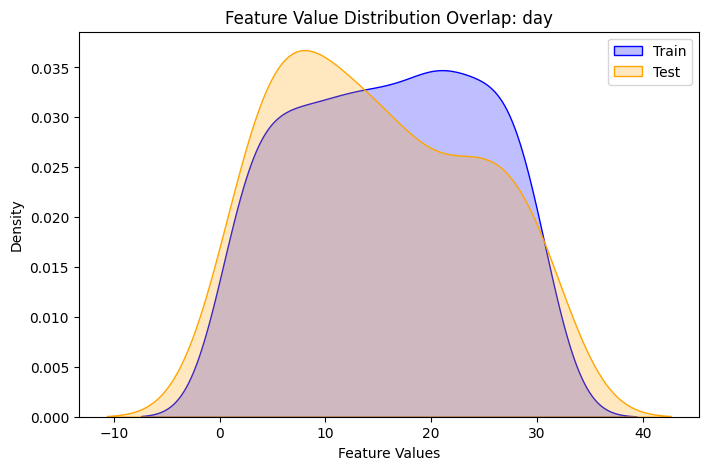

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


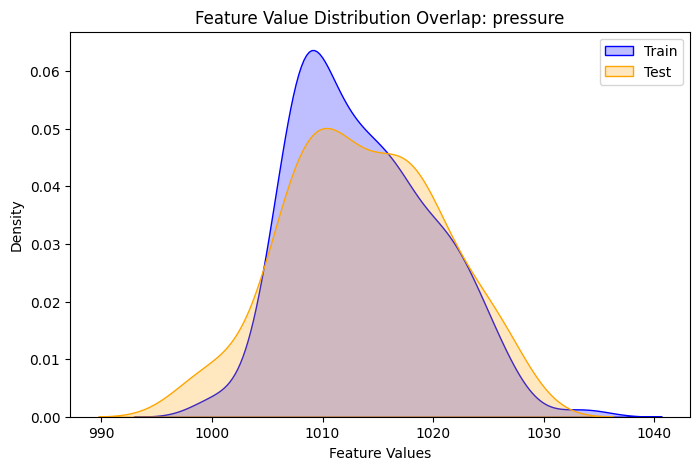

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


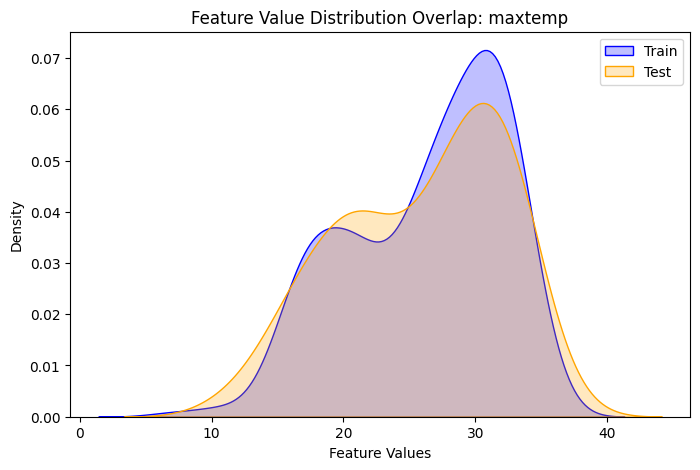

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


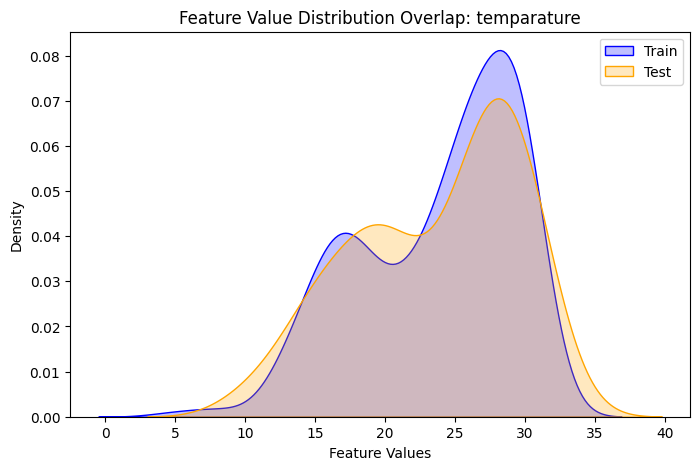

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


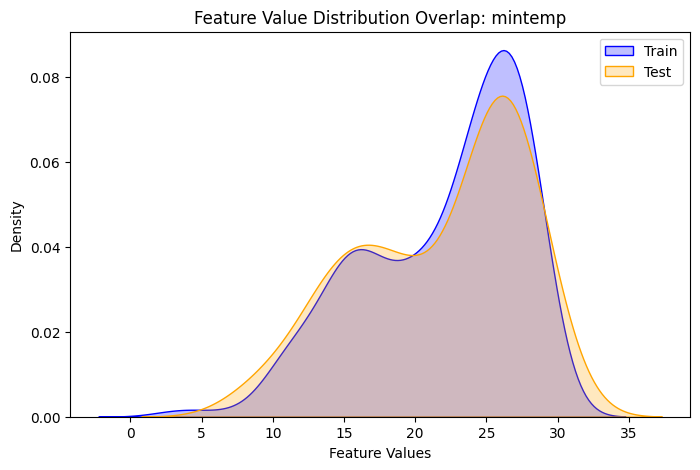

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


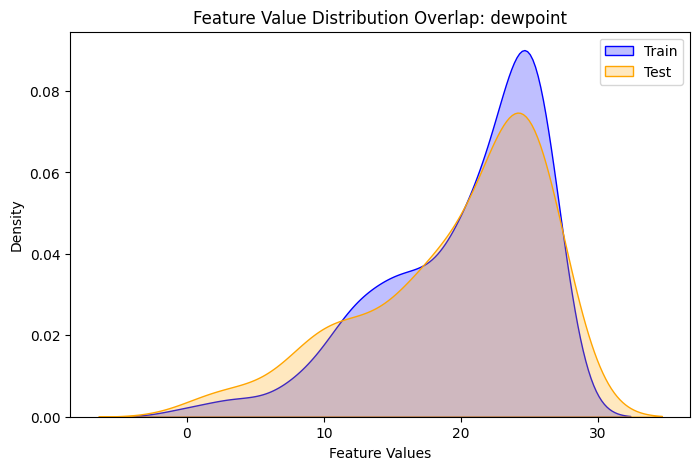

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


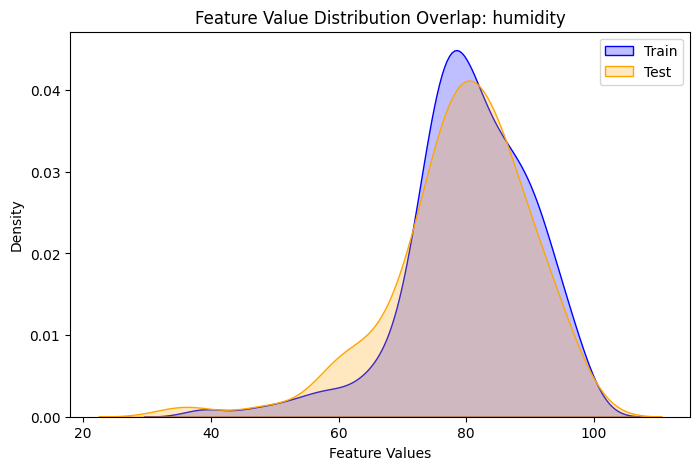

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


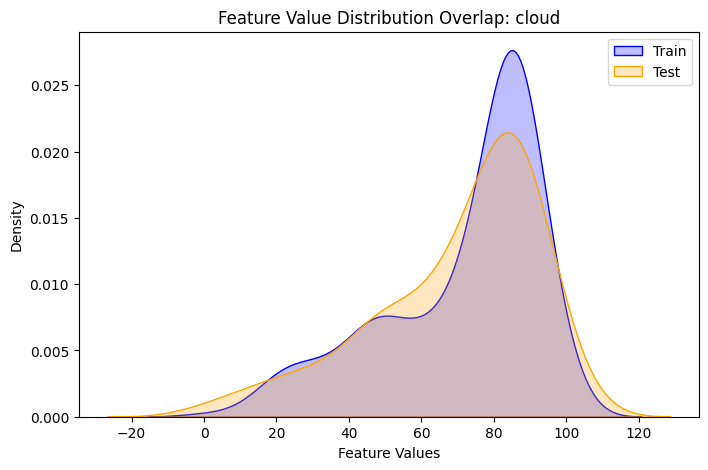

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


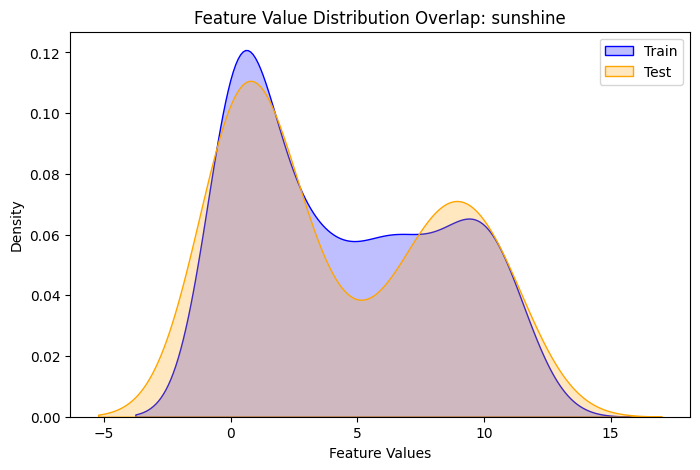

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


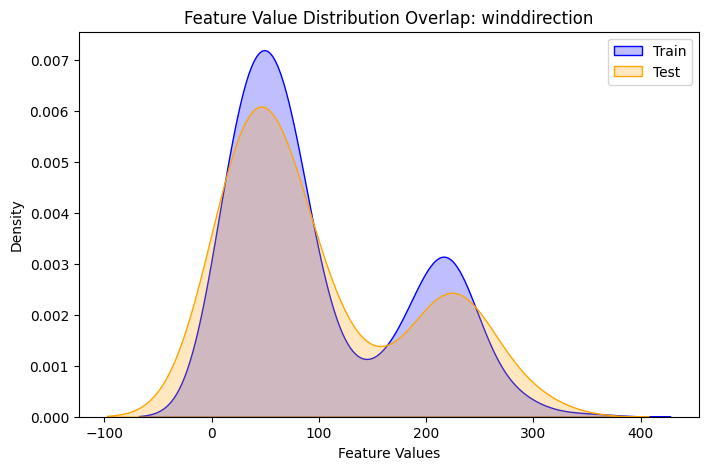

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_7096\1120181500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")


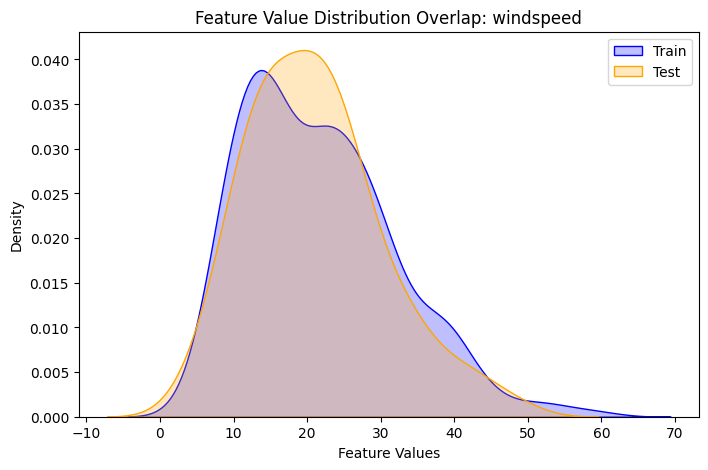

In [66]:

for feature_name in x_train.columns:
    
    x_train_feature = x_train[feature_name]
    x_test_feature = x_test[feature_name]
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(x_train_feature, label="Train", shade=True, color="blue")
    sns.kdeplot(x_test_feature, label="Test", shade=True, color="orange")
    plt.title(f"Feature Value Distribution Overlap: {feature_name}")
    plt.xlabel("Feature Values")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

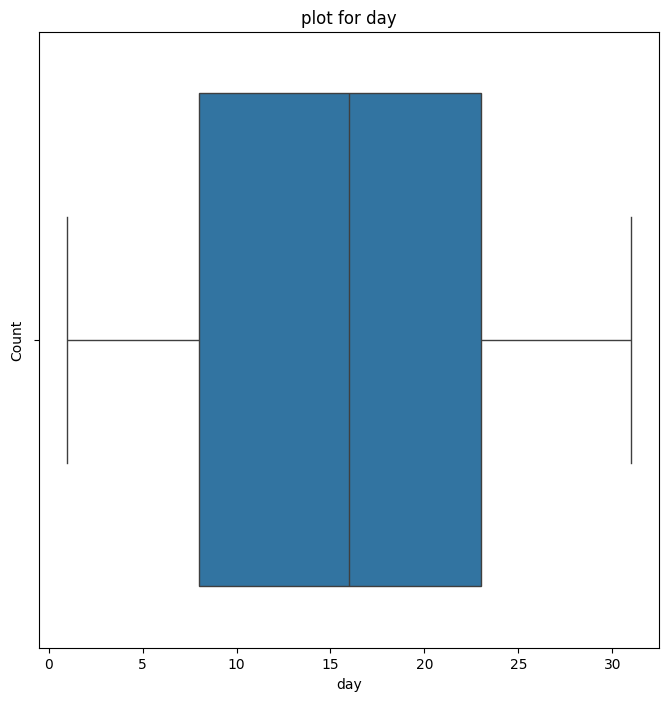

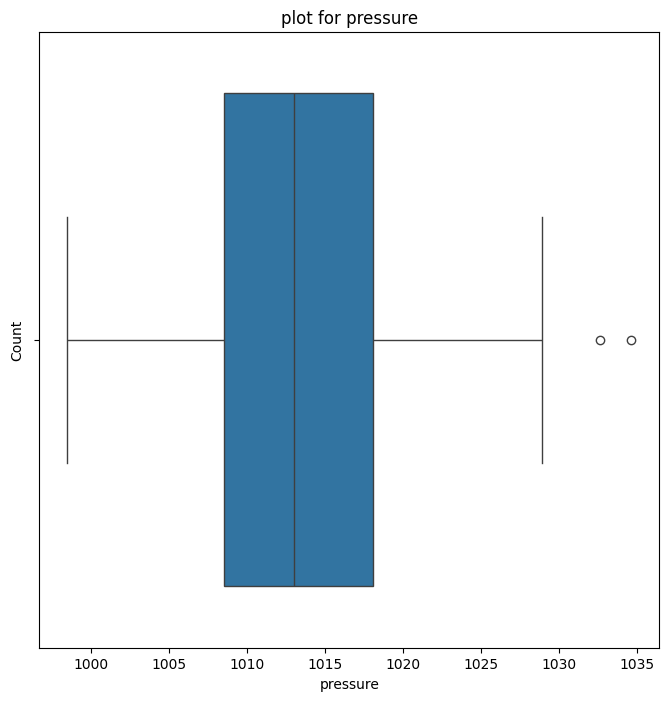

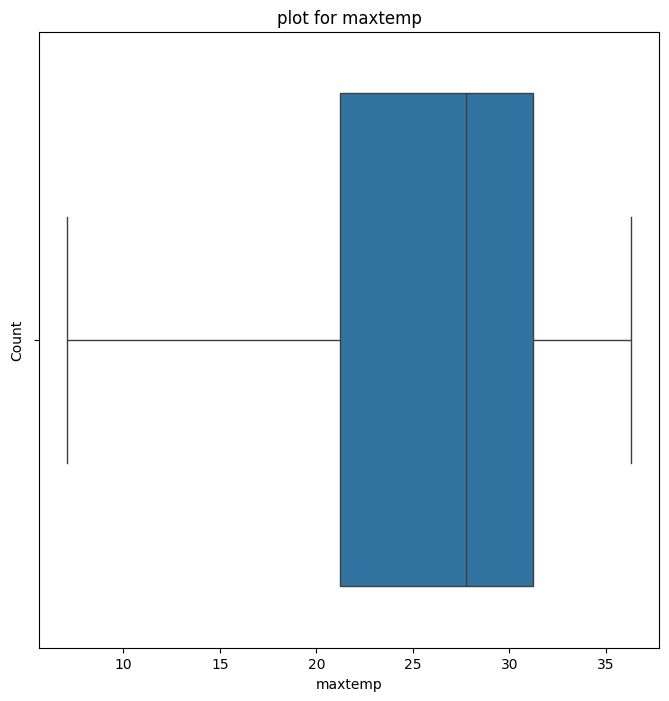

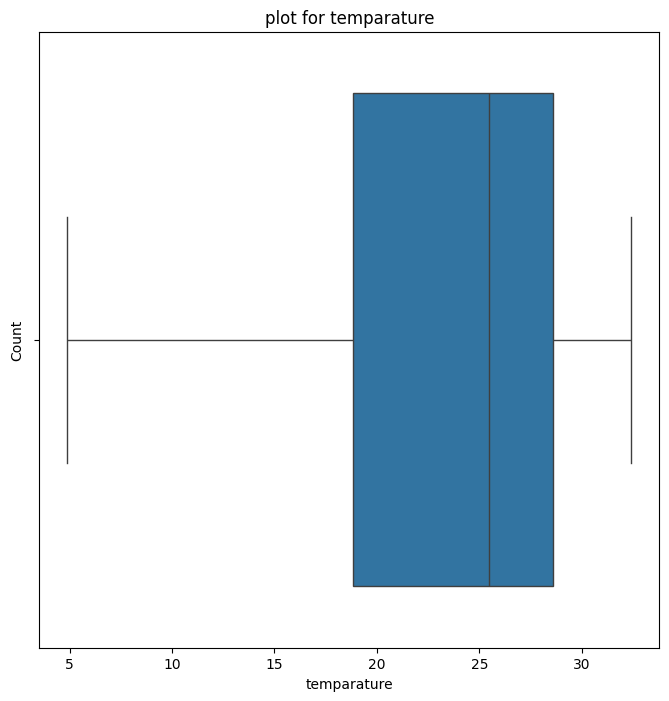

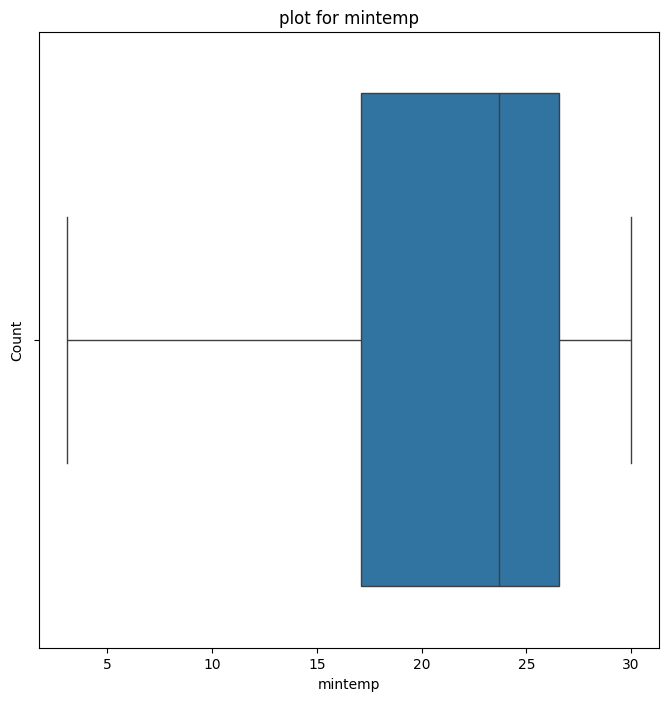

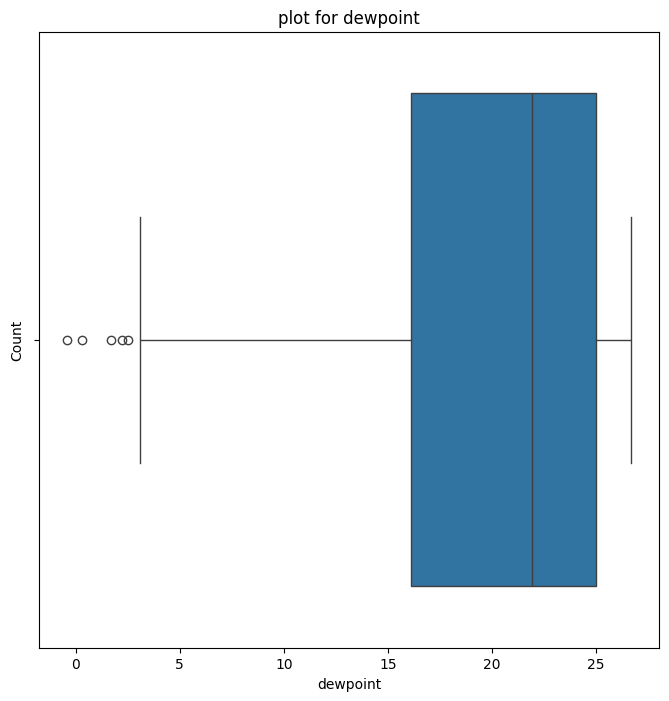

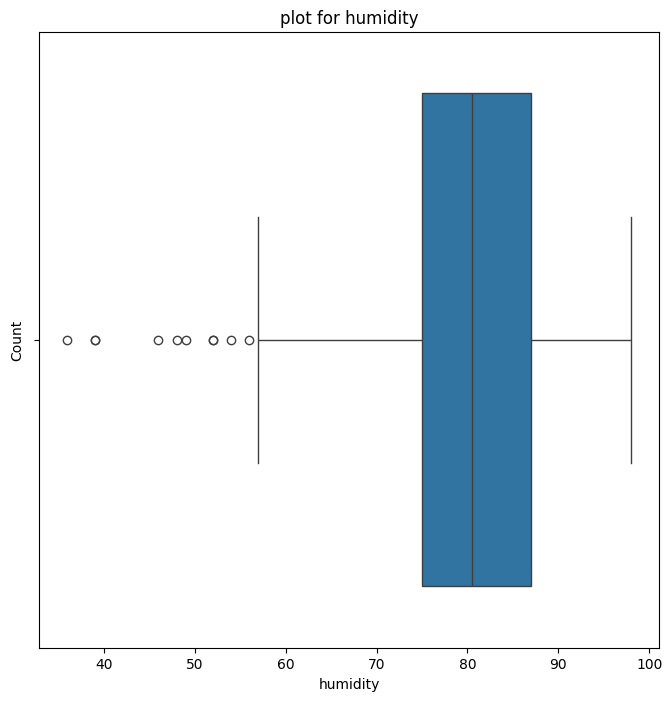

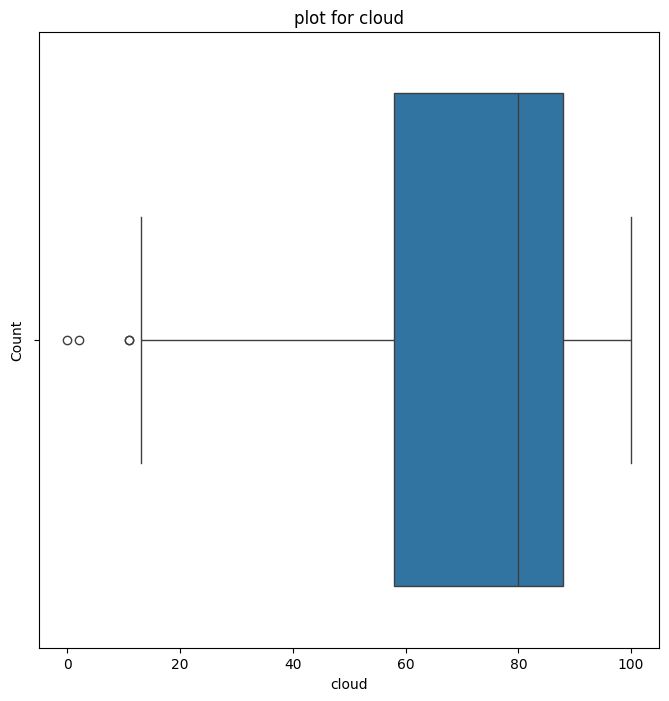

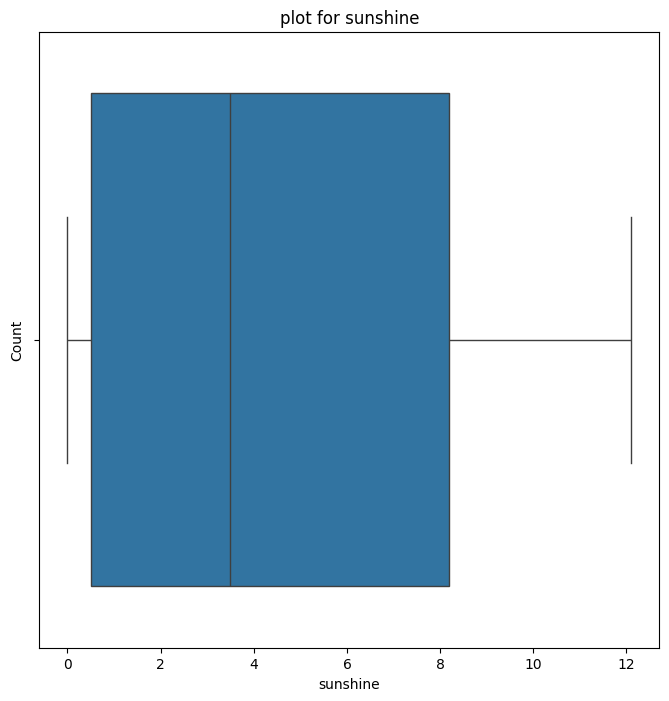

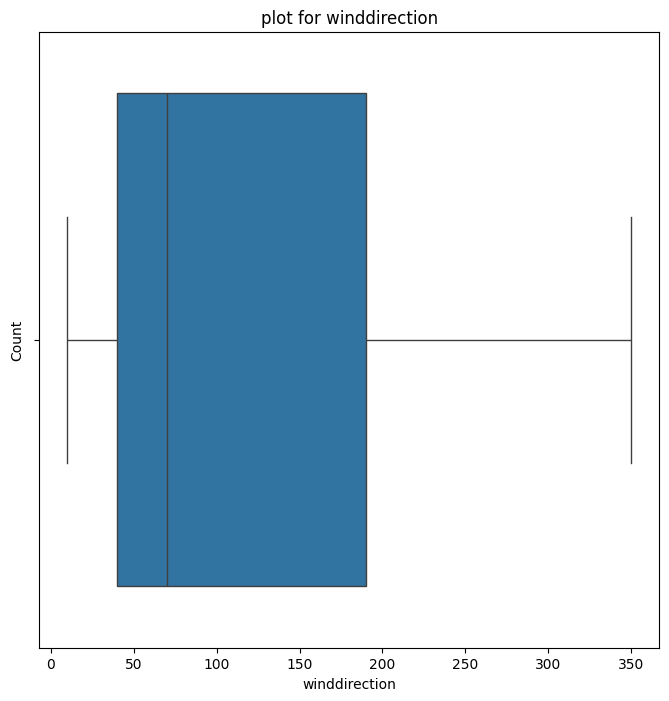

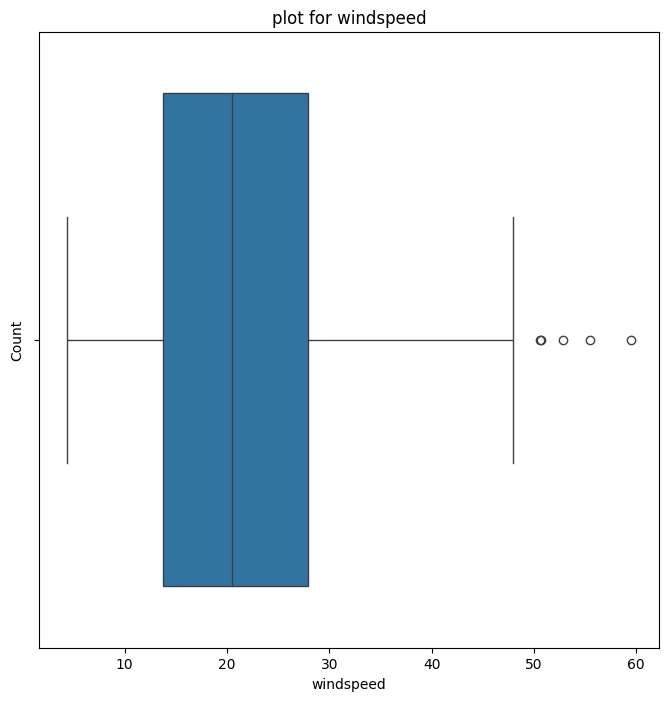

In [67]:
for column in x_train:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.boxplot(x=data[column])  
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

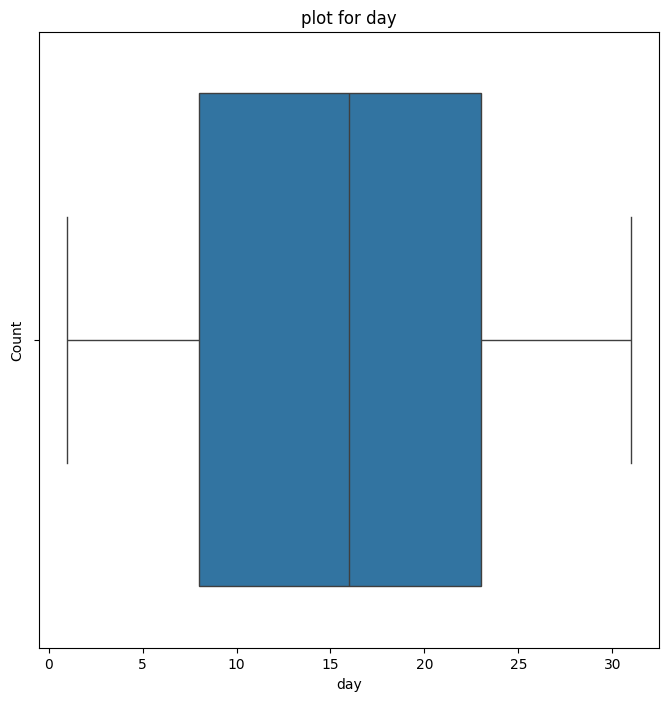

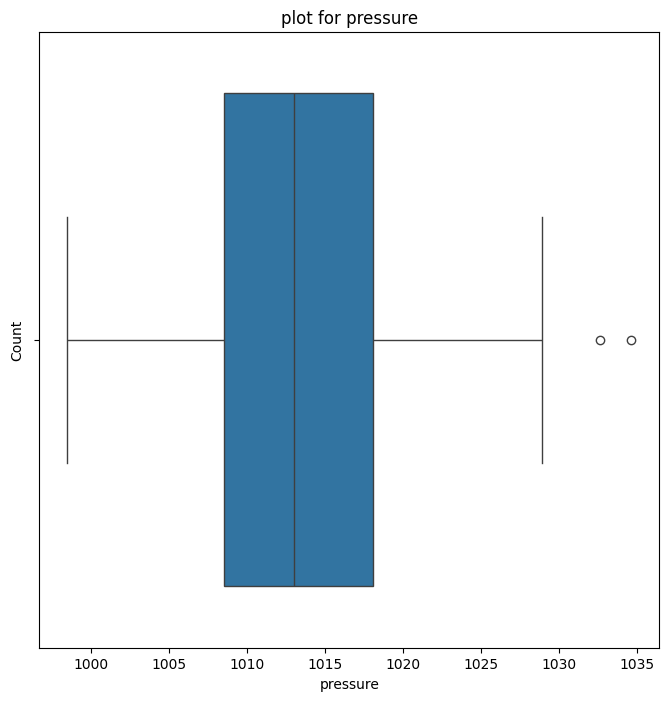

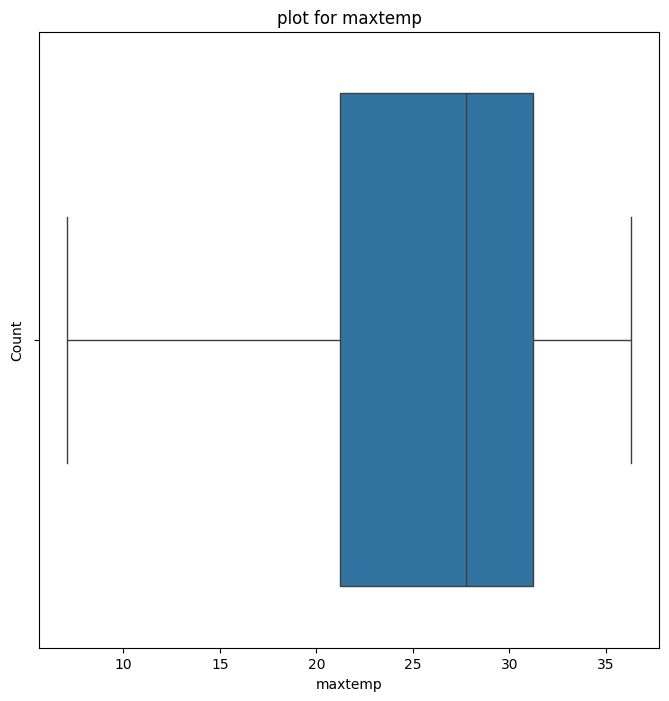

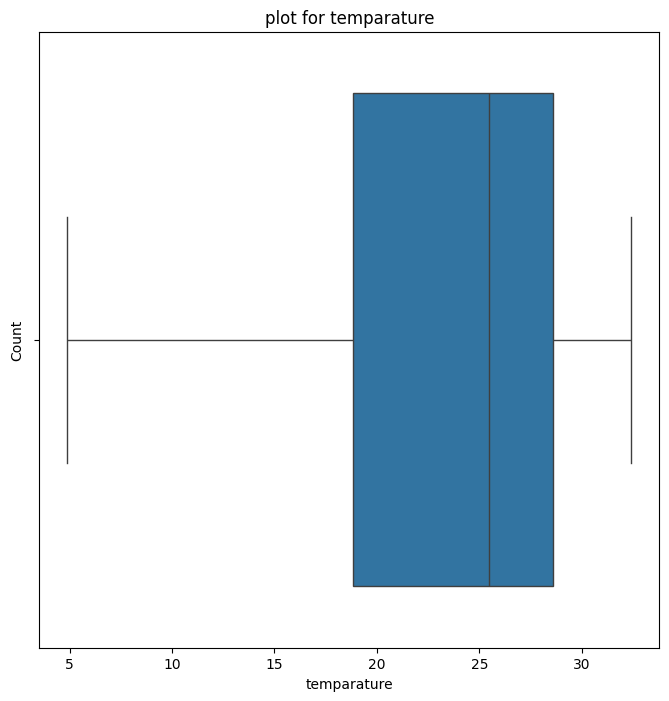

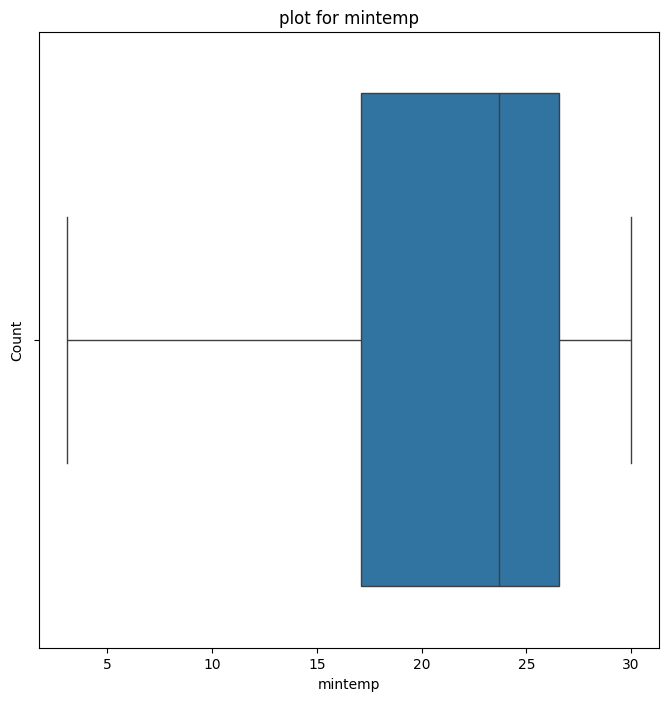

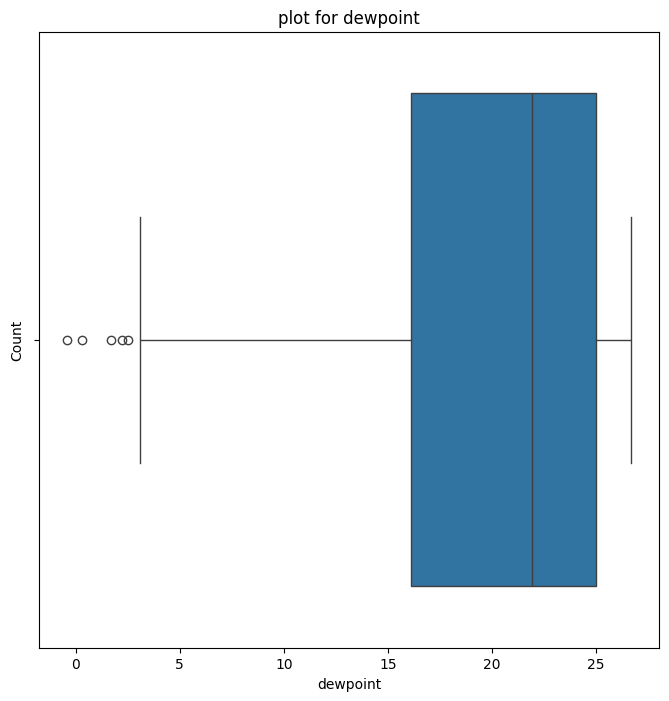

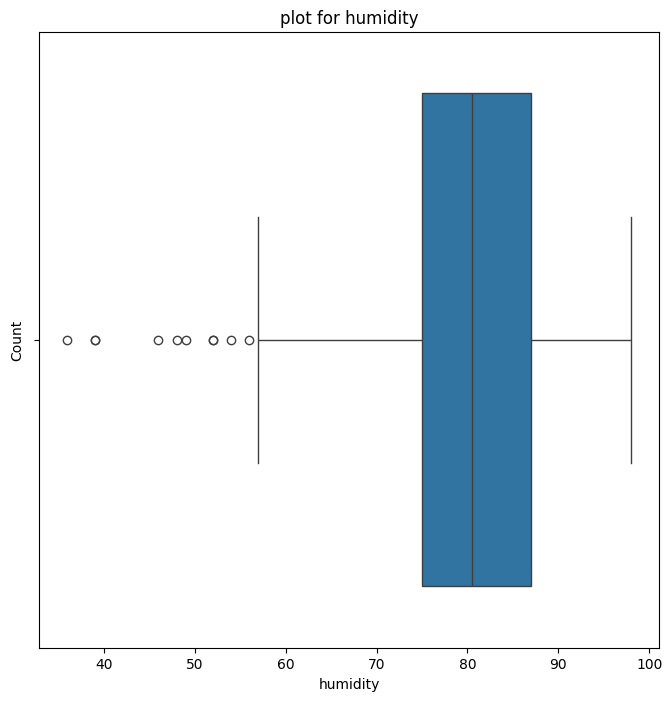

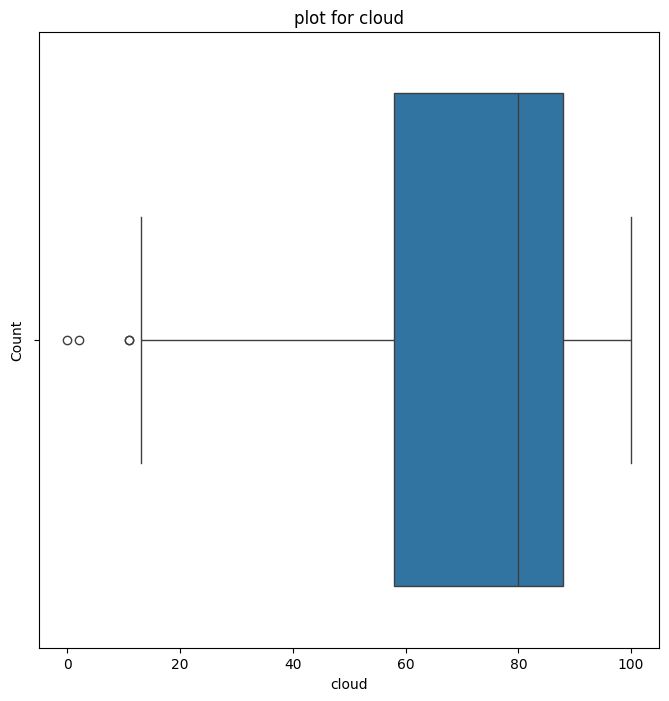

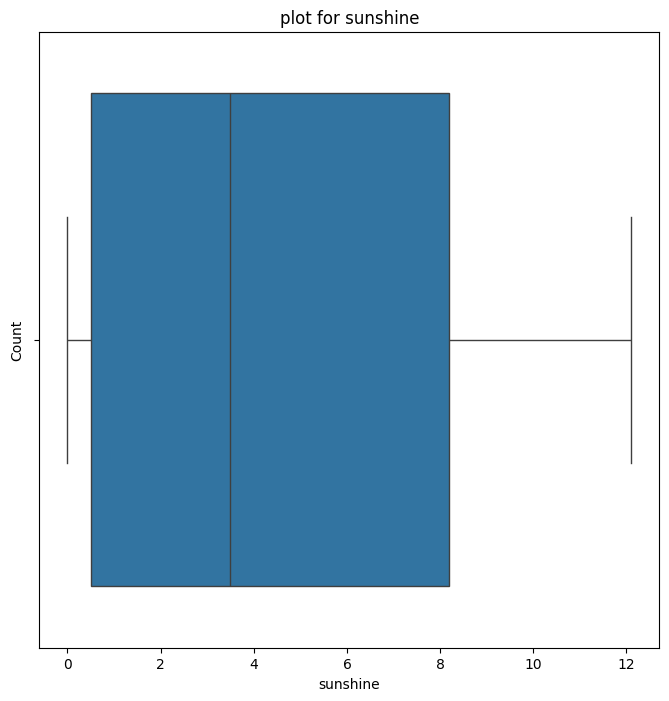

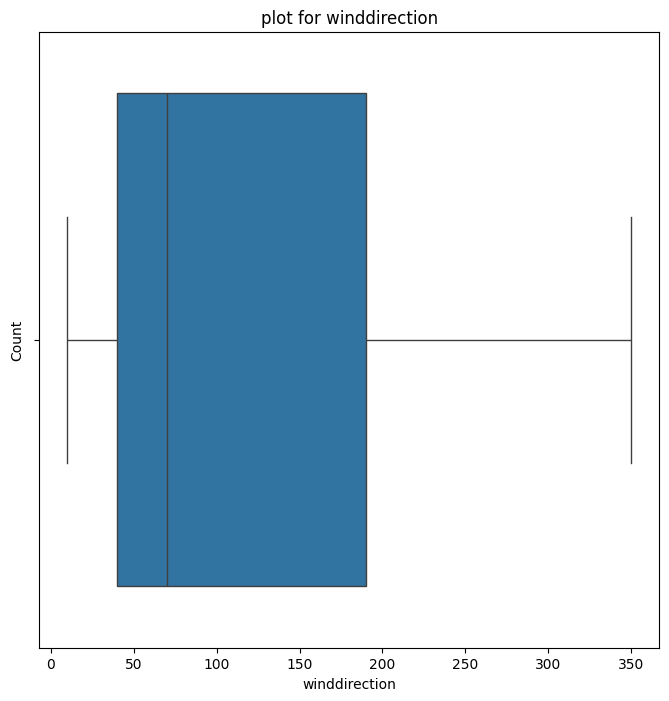

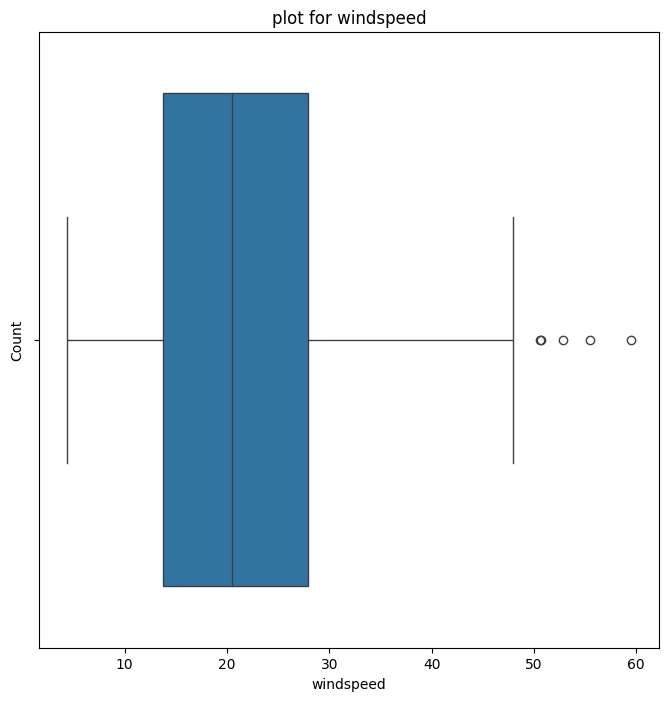

In [68]:
for column in x_test:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.boxplot(x=data[column])  
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [71]:
def remove_outliers(data):
    data_without_outliers = data.copy()  # Create a copy of the data to avoid modifying the original
    for column in data.columns:
        Q1 = data[column].quantile(0.25)  # First quartile
        Q3 = data[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
        
        # Apply the condition to filter out the outliers for the current column
        data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_bound) & 
                                                      (data_without_outliers[column] <= upper_bound)]
    
    return data_without_outliers


In [72]:
x_train= remove_outliers(x_train)
x_test=remove_outliers(x_test)

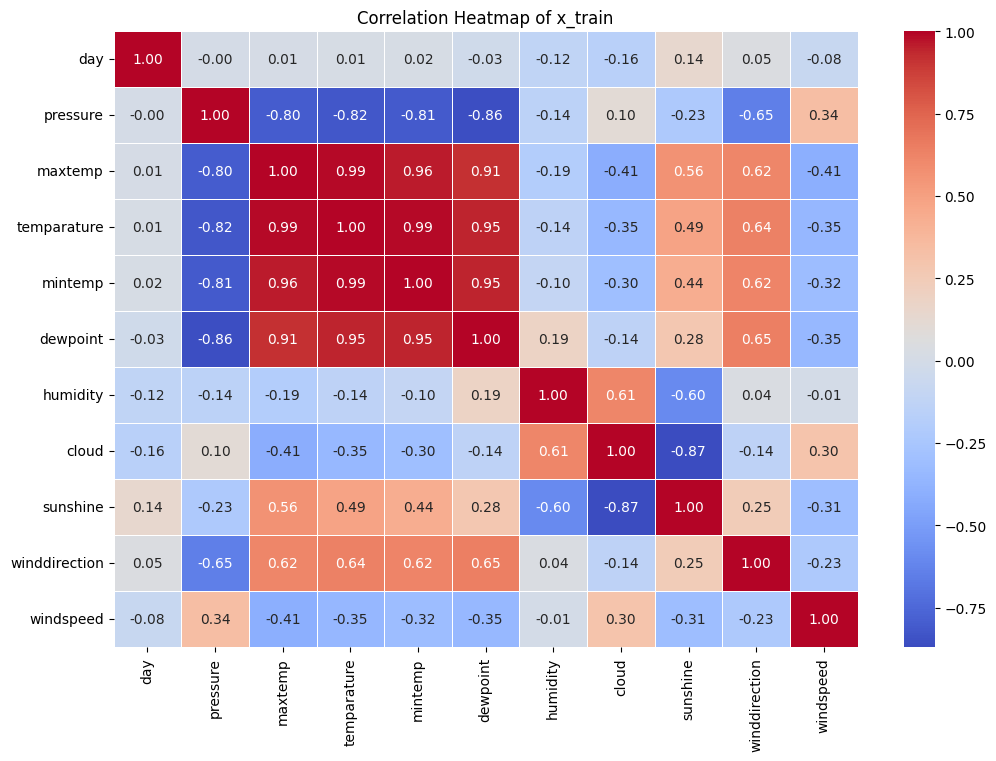

In [74]:
correlation_matrix = x_train.corr()  # Compute the correlation matrix

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap of x_train')
plt.show()

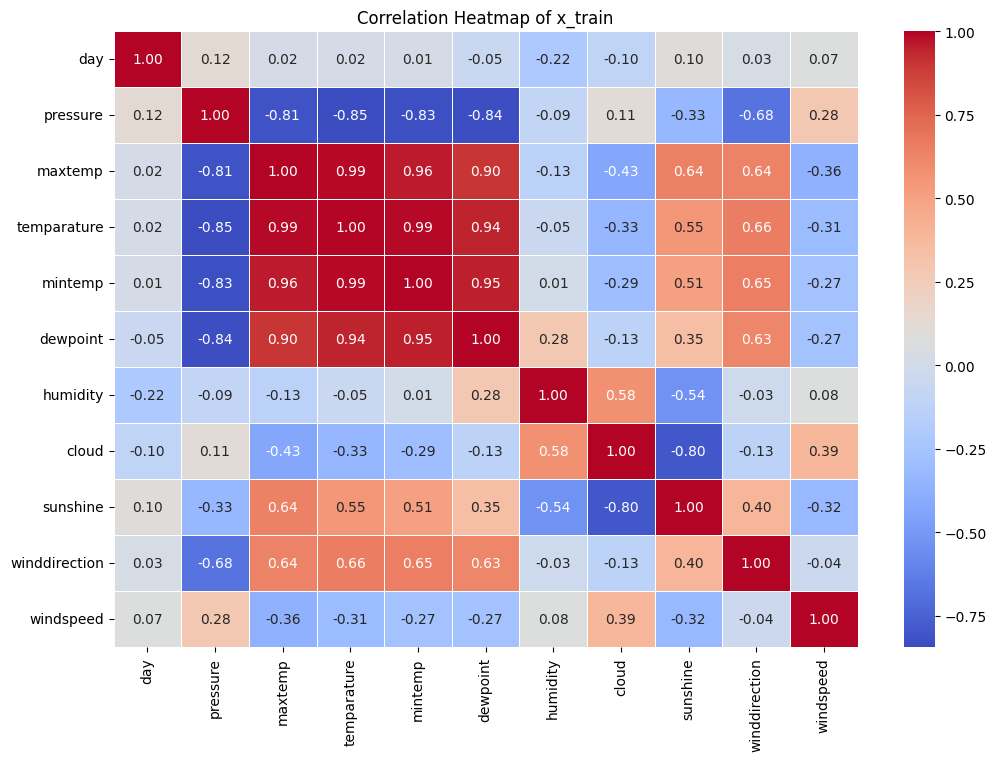

In [75]:
correlation_matrix = x_test.corr()  # Compute the correlation matrix

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap of x_train')
plt.show()

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x_train_with_const = add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Feature'] = x_train_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(x_train_with_const.values, i) 
                   for i in range(x_train_with_const.shape[1])]

print(vif_data)

          Feature            VIF
0           const  202028.960803
1             day       1.076706
2        pressure       4.849301
3         maxtemp      87.126248
4     temparature    1494.010047
5         mintemp      80.993288
6        dewpoint    1298.875670
7        humidity     135.117752
8           cloud       4.692872
9        sunshine       6.321080
10  winddirection       2.011426
11      windspeed       1.495151


In [78]:
x_test_with_const = add_constant(x_test)

vif_data = pd.DataFrame()
vif_data['Feature'] = x_test_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(x_test_with_const.values, i) 
                   for i in range(x_test_with_const.shape[1])]

print(vif_data)

          Feature            VIF
0           const  242960.270957
1             day       1.227913
2        pressure       6.981176
3         maxtemp     175.023644
4     temparature    2081.340973
5         mintemp     114.415404
6        dewpoint    1392.424162
7        humidity     146.190451
8           cloud       3.763680
9        sunshine       6.028385
10  winddirection       2.310454
11      windspeed       1.612340


In [ ]:
x_train.drop(columns=['maxtemp',' temparature','mintemp','dewpoint','humidity'])


In [101]:
x_test=x_test.drop(columns=['maxtemp','temparature','mintemp','dewpoint','humidity'])

In [102]:
x_test.shape

(70, 6)

In [91]:
y_train.isna().sum()

np.int64(0)

In [104]:
y_train.shape

(292,)

In [106]:
y_test.shape

(74,)

In [107]:
x_test.shape

(70, 6)

In [115]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from urllib.parse import urlparse

# Assuming x_train, x_test, y_train, y_test are already defined

signature = infer_signature(x_train, y_train)

# Set up RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Set up StandardScaler and PCA
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)


# Set up GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Start MLflow run
with mlflow.start_run():

    # Fit GridSearchCV to the scaled and PCA-transformed data
    grid_search.fit(x_train_sc, y_train[:279])

    # Get the best model from GridSearchCV
    best_rf_model = grid_search.best_estimator_

    # Predict on test and train sets
    y_pred_test = best_rf_model.predict(x_test_sc)
    y_pred_train = best_rf_model.predict(x_train_sc)

    # Calculate accuracy for both test and train
    accuracy_test = f1_score(y_test[:70], y_pred_test)
    accuracy_train = f1_score(y_train[:279], y_pred_train)

    # Log the best parameters from GridSearchCV
    mlflow.log_param("best n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_param("best max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_param("best min_samples_split", grid_search.best_params_['min_samples_split'])
    mlflow.log_param("best min_samples_leaf", grid_search.best_params_['min_samples_leaf'])

    # Log accuracy metrics
    mlflow.log_metric("f_train", accuracy_train)
    mlflow.log_metric("f_test", accuracy_test)

    # Set up tracking URI for MLflow
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    tracking_url = urlparse(mlflow.get_tracking_uri()).scheme

    # Log the model based on tracking URL
    if tracking_url != 'file':
        mlflow.sklearn.log_model(best_rf_model, "model", registered_model_name="Best Random Forest Model")
    else:
        mlflow.sklearn.log_model(best_rf_model, "model", signature=signature)

    # Optionally log the full model again
    mlflow.sklearn.log_model(best_rf_model, "random_forest_model")

    # Print results
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Test Accuracy: {accuracy_test}")


c:\Users\Mohammad\Downloads\MLFlowStarter\venv\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Fitting 3 folds for each of 108 candidates, totalling 324 fits


2024/12/28 12:23:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Best Random Forest Model' already exists. Creating a new version of this model...
2024/12/28 12:23:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best Random Forest Model, version 9
Created version '9' of model 'Best Random Forest Model'.
2024/12/28 12:24:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Train Accuracy: 0.8899521531100478
Test Accuracy: 0.8034188034188035
🏃 View run adaptable-grub-514 at: http://127.0.0.1:5000/#/experiments/0/runs/aa7ced58b58a48bbbf1c344b79212efd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
